## Model - 1 : Linear Regressino Model for Beta estimation in context to Capital Asset Pricing Model (CAPM)
---

In [1]:
#importing all required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
# Plotly.express module can plot interactive plots easily and effectively.

In [2]:
import os

# Specify the new directory path
new_directory = "/Users/yadav/ERP/real-data-analysis/final-files"  # Replace with your desired path

# Change the current working directory
os.chdir(new_directory)

In [3]:
from sklearn.model_selection import train_test_split
transformed_df = pd.read_csv("transformed_returns_(2020-2023).csv", parse_dates=['Date'], index_col='Date')

# Display the first few rows to check if the file was loaded correctly
print(transformed_df.head())

# Assuming you have your transformed DataFrame `transformed_df`
linear_train_df, linear_test_df = train_test_split(transformed_df, test_size=0.2, shuffle=False) #shuffle would be false as we are dealing with time series data


            Market_Returns  Asset_Returns
Date                                     
2020-01-02        0.000000       0.000000
2020-01-03       -0.007118      -0.016065
2020-01-06        0.003474       0.004134
2020-01-07       -0.002863       0.012047
2020-01-08        0.004843       0.001816


In [4]:
linear_train_df.tail(10)

,Market_Returns,Asset_Returns
Date,,
2023-03-06,0.000500,-0.014252
2023-03-07,-0.015519,-0.011318
2023-03-08,0.001221,0.038152
2023-03-09,-0.018652,-0.031002
2023-03-10,-0.014669,-0.020288
2023-03-13,-0.001695,-0.000141
2023-03-14,0.016291,0.047581
2023-03-15,-0.007162,0.006676
2023-03-16,0.017382,0.054014


In [5]:
linear_test_df.head(10)

,Market_Returns,Asset_Returns
Date,,
2023-03-20,0.008741,0.006626
2023-03-21,0.012799,0.011362
2023-03-22,-0.016644,0.010086
2023-03-23,0.002806,0.027137
2023-03-24,0.005461,-0.015331
2023-03-27,0.001465,-0.009443
2023-03-28,-0.001757,-0.004744
2023-03-29,0.014054,0.021550
2023-03-30,0.005530,0.014602


                            OLS Regression Results                            
Dep. Variable:          Asset_Returns   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     753.2
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          8.06e-117
Time:                        16:20:30   Log-Likelihood:                 1872.8
No. Observations:                 788   AIC:                            -3742.
Df Residuals:                     786   BIC:                            -3732.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0014      0.001      1.

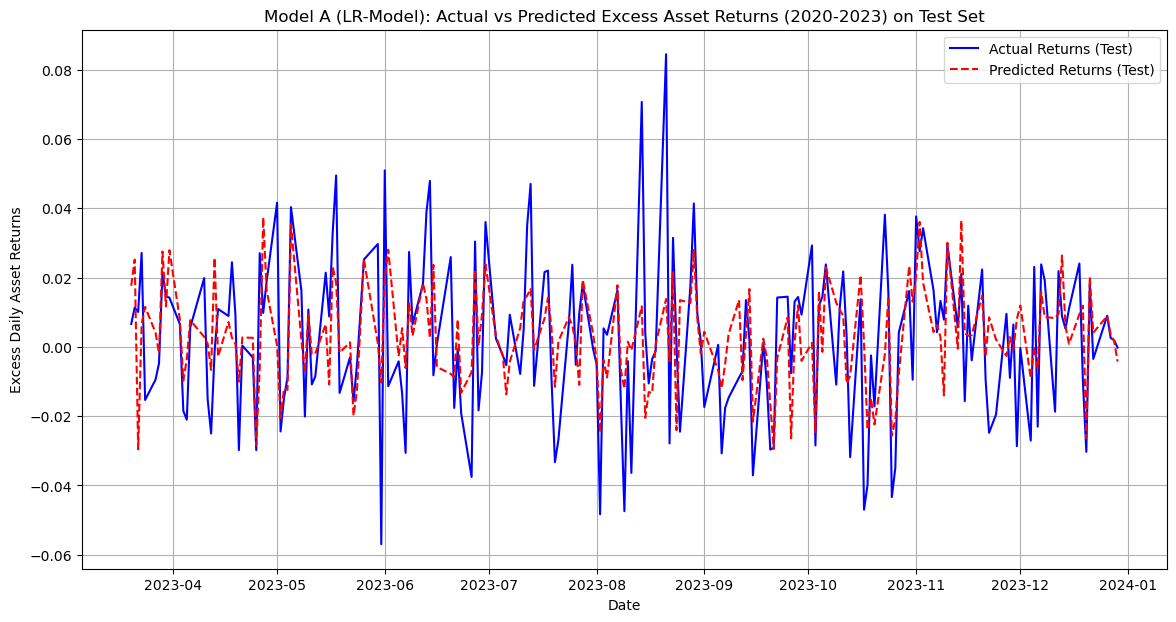

In [6]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Define X (independent variable) and y (dependent variable) for training
X_train = sm.add_constant(linear_train_df['Market_Returns'])  # Adding constant to model intercept
y_train = linear_train_df['Asset_Returns']  # Dependent variable: Asset returns

# Fit the OLS model
OLS_model = sm.OLS(y_train, X_train)
OLS_model_fit = OLS_model.fit(cov_type='HC3')

# Output the beta estimate and summary
print(OLS_model_fit.summary())

# Prepare the test set
X_test = sm.add_constant(linear_test_df['Market_Returns'])
y_test = linear_test_df['Asset_Returns']

# Forecast asset returns using the estimated beta (OLS model)
y_test_pred = OLS_model_fit.predict(X_test)

# Evaluation Metrics for Test Set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Set - Root Mean Squared Error: {test_rmse}")
print(f"Test Set - Mean Absolute Error: {test_mae}")
print(f"Test Set - Mean Absolute Percentage Error: {test_mape}")
print(f"Test Set - R^2 score: {test_r2}")

# Plot the predicted returns vs actual returns for the test set
plt.figure(figsize=(14, 7))
plt.plot(linear_test_df.index, y_test, label='Actual Returns (Test)', color='blue')
plt.plot(linear_test_df.index, y_test_pred, label='Predicted Returns (Test)', color='red', linestyle='--')
plt.title('Model A (LR-Model): Actual vs Predicted Excess Asset Returns (2020-2023) on Test Set')
plt.xlabel('Date')
plt.ylabel('Excess Daily Asset Returns')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Actual Returns (Test)
fig.add_trace(go.Scatter(x=linear_test_df.index, 
                         y=y_test, 
                         mode='lines', 
                         name='Actual Returns (Test)',
                         line=dict(color='blue')))

# Predicted Returns (Test)
fig.add_trace(go.Scatter(x=linear_test_df.index, 
                         y=y_test_pred, 
                         mode='lines', 
                         name='Predicted Returns (Test)',
                         line=dict(color='red', dash='dash')))

# Update layout
fig.update_layout(title='Test Set: Actual vs Predicted Returns',
                  xaxis_title='Date',
                  yaxis_title='Log Returns (Differenced)',
                  legend=dict(x=0, y=1.0),
                  hovermode='x unified')

# Show the figure
fig.show()
